# Reddit Upvotes Prediction - Mini Project

In our project, we analyzed and hoped to understand more about a website called reddit. reddit is a news aggregator, a fansite, or a host for creative pursuits -- all by way of its unique voting system. Users make contributions called threads, which consist either of text or a single link, to topics called subreddits (identified by the "/r/" prefix). These threads receive up- and downvotes from other users, which are combined along with the lifetime of the thread into a "score" that is used to determine the default display order of threads. Other users can in turn comment on these threads, and these comments are also voted upon, scored, and ordered in a similar manner.

### Identifying the Problem

Our problem, then, would be one of regression. We hoped to first identify features that characterize responses and to then predict the popularity of new /r/AskReddit answers -- that is, the scores of top-level comments.

In [1]:
#Import the required libraries

import bz2
import json

import pandas as pd
import numpy as np
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import matplotlib.pyplot as plt
# For missing values
import missingno as msg


# For handling warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the dataset

import os
os.chdir('C:\\Users\ASUS\Downloads')

filename = 'RC_2015-01.bz2'

with bz2.open(filename, "rt") as bz2input:
    lines = []
    for i, line in enumerate(bz2input):
        if i == 200000:
            break
        reddit = json.loads(line)
        lines.append(reddit)
        
        
df = pd.DataFrame(lines)

print("Shape of data=>",df.shape)

df.head()

Shape of data=> (200000, 21)


,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
0,False,t1_cnas8zv,t3_2qyr1a,Most of us have some family members like this....,0,1420070400,14,YoungModern,None,cnas8zv,...,t3_2qyr1a,exmormon,None,None,0,1425124282,14,0,t5_2r0gj,False
1,False,t1_cnas8zw,t3_2qv6c6,But Mill's career was way better. Bentham is l...,0,1420070400,3,RedCoatsForever,None,cnas8zw,...,t1_cnas2b6,CanadaPolitics,on,Ontario,0,1425124282,3,0,t5_2s4gt,False
2,False,t1_cnas8zx,t3_2qxefp,"Mine uses a strait razor, and as much as i lov...",0,1420070400,1,vhisic,None,cnas8zx,...,t3_2qxefp,AdviceAnimals,None,None,0,1425124282,1,0,t5_2s7tt,False
3,False,t1_cnas8zy,t3_2qys4x,[deleted],0,1420070400,1,[deleted],None,cnas8zy,...,t3_2qys4x,AdviceAnimals,None,None,0,1425124282,1,0,t5_2s7tt,False
4,False,t1_cnas8zz,t3_2qm5bi,"Very fast, thank you!",0,1420070400,2,Mastersimpson,None,cnas8zz,...,t3_2qm5bi,freedonuts,None,None,0,1425124282,2,0,t5_2y51u,False


In [3]:
# to check all the columns to perform analysis on
df.columns

Index(['score_hidden', 'name', 'link_id', 'body', 'downs', 'created_utc',
       'score', 'author', 'distinguished', 'id', 'archived', 'parent_id',
       'subreddit', 'author_flair_css_class', 'author_flair_text', 'gilded',
       'retrieved_on', 'ups', 'controversiality', 'subreddit_id', 'edited'],
      dtype='object')

In [4]:
# amount of value missing in each column
percent_missing = ((df.isnull().sum())/np.product(df.shape)) *100
percent_missing

score_hidden              0.000000
name                      0.000000
link_id                   0.000000
body                      0.000000
downs                     0.000000
created_utc               0.000000
score                     0.000000
author                    0.000000
distinguished             4.728357
id                        0.000000
archived                  0.000000
parent_id                 0.000000
subreddit                 0.000000
author_flair_css_class    3.004595
author_flair_text         2.992976
gilded                    0.000000
retrieved_on              0.000000
ups                       0.000000
controversiality          0.000000
subreddit_id              0.000000
edited                    0.000000
dtype: float64

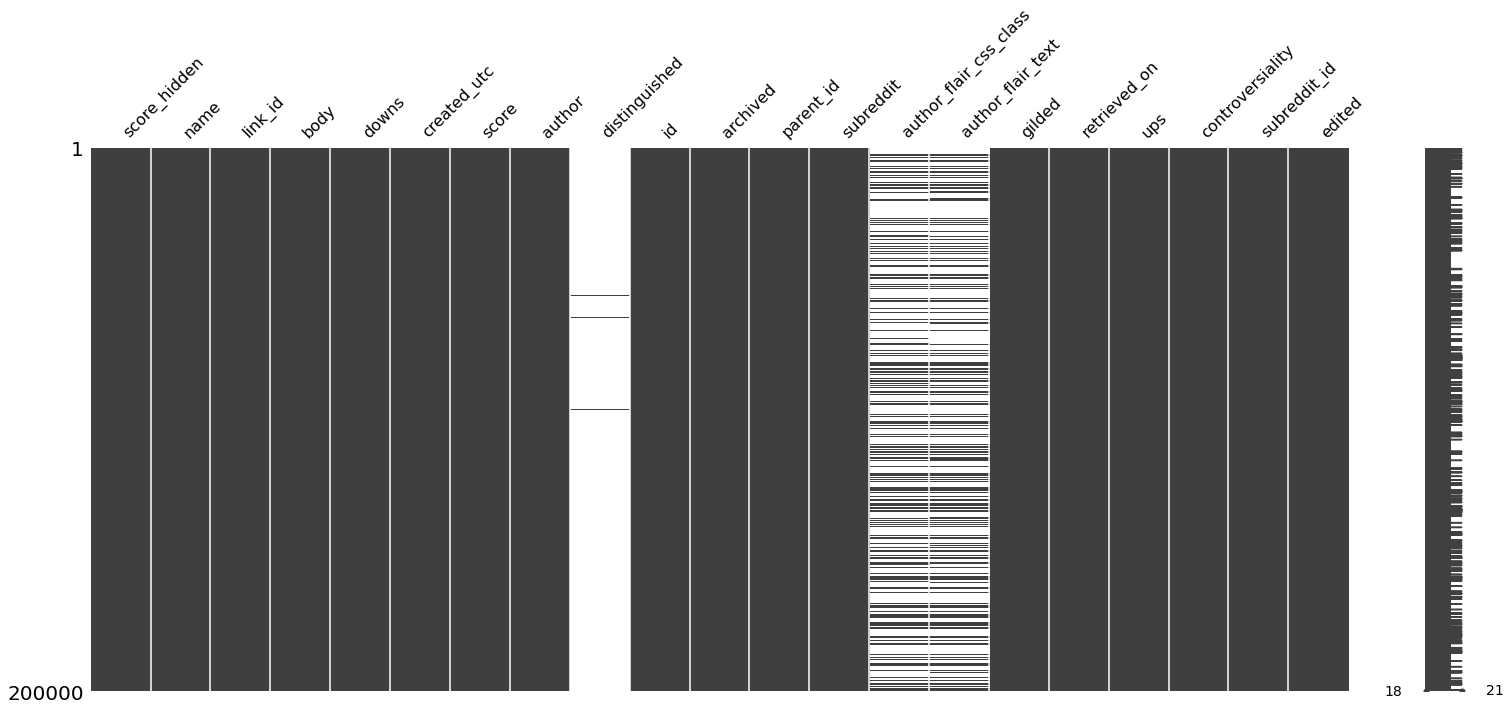

In [5]:
#visualize the amount of data missing
msg.matrix(df)

In [6]:
# to evaluate the numerical and categorical data present 
df.describe(include='all')

,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
count,200000,200000,200000,200000,200000.0,200000,200000.000000,200000,1409,200000,...,200000,200000,73807,74295,200000.000000,2.000000e+05,200000.000000,200000.0,200000,200000
unique,2,200000,43706,182558,NaN,10561,NaN,86062,1,200000,...,131150,6498,9596,17823,NaN,NaN,NaN,NaN,6498,4775
top,False,t1_cnaw0vp,t3_2qys88,[deleted],NaN,1420073961,NaN,[deleted],moderator,cnavoda,...,t3_2qys88,AskReddit,,,NaN,NaN,NaN,NaN,t5_2qh1i,False
freq,199100,1,3281,12771,NaN,37,NaN,15786,1409,1,...,1662,14327,10137,14634,NaN,NaN,NaN,NaN,14327,194615
mean,NaN,NaN,NaN,NaN,0.0,NaN,4.336950,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000770,1.425123e+09,4.336950,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,0.0,NaN,32.059644,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.029145,5.837471e+02,32.059644,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,0.0,NaN,-302.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,1.425122e+09,-302.000000,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.0,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,1.425123e+09,1.000000,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.0,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,1.425123e+09,1.000000,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.0,NaN,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,1.425124e+09,3.000000,0.0,NaN,NaN


In [7]:
# to which degree the data is biased
df.skew()

score_hidden        14.806419
downs                0.000000
created_utc          0.063430
score               48.166391
archived             0.000000
gilded              40.719841
retrieved_on         0.002372
ups                 48.166391
controversiality     0.000000
edited               5.845374
dtype: float64

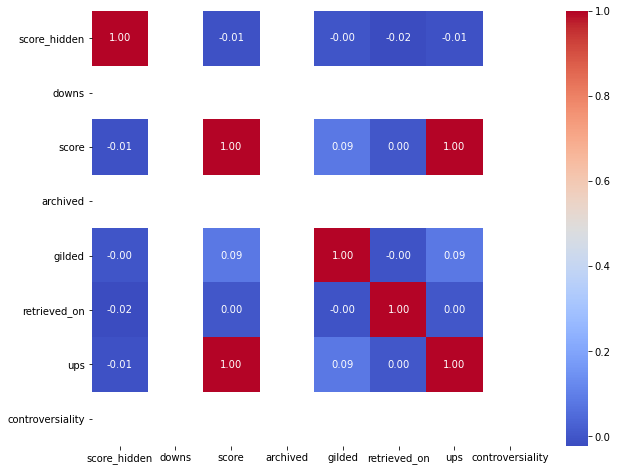

In [8]:
#check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [9]:
#to check for the zero variance columns

unique_counts=df.nunique(axis=0, dropna=True)
unique_counts

score_hidden                   2
name                      200000
link_id                    43706
body                      182558
downs                          1
created_utc                10561
score                        534
author                     86062
distinguished                  1
id                        200000
archived                       1
parent_id                 131150
subreddit                   6498
author_flair_css_class      9596
author_flair_text          17823
gilded                         3
retrieved_on                1908
ups                          534
controversiality               1
subreddit_id                6498
edited                      4775
dtype: int64

In [10]:
import re
#!pip install textstat
import textstat
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
import gensim
#nltk.download('punkt')

In [11]:
def clean_bodies_frame(frame):
    frame['body'] = pd.Series([body.replace("\n", " ") for body in frame['body']])
    return frame

cleanedframe=clean_bodies_frame(df)

In [12]:
cleanedframe=df
print(cleanedframe['body'].isna().sum())
print(cleanedframe['body'].isnull().sum())

0
0


In [13]:
#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(cleanedframe['body'])]
tagged_data=[]
c=0
for i, _d in enumerate(cleanedframe['body']):
    tagged_data.append(TaggedDocument(words=word_tokenize(_d.lower()),tags=[str(i)]))
    c+=1
    if c%25000==0:
        print(c)

25000
50000
75000
100000
125000
150000
175000
200000


In [15]:
df=df.drop(columns=['parent_id','id','link_id','retrieved_on','subreddit_id'])

In [21]:
df=df.drop(columns=['score_hidden','name'])

In [23]:
df.head()

,body,downs,created_utc,score,author,distinguished,archived,subreddit,author_flair_css_class,author_flair_text,gilded,ups,controversiality,edited
0,Most of us have some family members like this....,0,1420070400,14,YoungModern,None,False,exmormon,None,None,0,14,0,False
1,But Mill's career was way better. Bentham is l...,0,1420070400,3,RedCoatsForever,None,False,CanadaPolitics,on,Ontario,0,3,0,False
2,"Mine uses a strait razor, and as much as i lov...",0,1420070400,1,vhisic,None,False,AdviceAnimals,None,None,0,1,0,False
4,"Very fast, thank you!",0,1420070400,2,Mastersimpson,None,False,freedonuts,None,None,0,2,0,False
5,"The guy is a professional, and very good at wh...",0,1420070400,6,BigGupp1,None,False,WTF,None,None,0,6,0,False


In [24]:
df.describe()

,downs,score,gilded,ups,controversiality
count,187229.0,187229.000000,187229.000000,187229.000000,187229.0
mean,0.0,4.494443,0.000823,4.494443,0.0
std,0.0,32.108840,0.030122,32.108840,0.0
min,0.0,-302.000000,0.000000,-302.000000,0.0
25%,0.0,1.000000,0.000000,1.000000,0.0
50%,0.0,1.000000,0.000000,1.000000,0.0
75%,0.0,3.000000,0.000000,3.000000,0.0
max,0.0,3967.000000,2.000000,3967.000000,0.0


In [18]:
# as we will working on the body of the post, the rows with no body needs to be deleted.

no_body=df[df.body=='[deleted]'].index

df.drop(no_body, inplace = True)

print("Shape of data=>",df.shape)

Shape of data=> (187229, 16)


In [22]:
df.to_csv("clean_reddit_01_2015.csv",index=False)